In [22]:
library(ggplot2)
library(dplyr)
library(ggdist)
library(lme4)
library(ggeffects)
library(patchwork)
library(lmerTest)
library(brms)
library(blme)
library(rlang)
library(glmmTMB)
library(emmeans)

blue <- "#336199"
lightblue <- "#5688C7"
red <- "#E74236"
lightred <- "#EE766D"
green <- "#00A35F"
lightgreen <- "#0ACC7B"

In [43]:
# Load data
data <- read.csv("data/fullResults.csv", header=T)

data <- data %>%
  mutate(anchor = ifelse(anchorCategory == "anchor", "anchor", "non-anchor"))

data <- data %>%
  mutate(alignment = ifelse(alignmentCategory == "aligned", "aligned", "unaligned"))

data <- data %>%
  mutate(anchorType = case_when(
    selectedPart == 25 ~ "25",
    selectedPart == 50 ~ "50",
    TRUE ~ "non-anchor"
))

data$alignment <- factor(data$alignment, levels = c("aligned", "unaligned"))
data$anchor <- factor(data$anchor, levels = c("anchor", "non-anchor"))
data$chartType <- factor(data$chartType, levels = c("pie", "line"))

data$alignment_num <- ifelse(data$alignment == "aligned", -1, 1)
data$anchor_num <- ifelse(data$anchor == "anchor", -1, 1)
data$chartType_num <- ifelse(data$chartType == "pie", -1, 1)

data$alignmentCategory <- factor(data$alignmentCategory, levels = c("aligned", "near-aligned", "far-from-aligned"))
data$anchorCategory <- factor(data$anchorCategory, levels = c("anchor", "near-anchor", "far-anchor"))

data$distToNearest5 <- abs(data$selectedPart - round(data$selectedPart / 5) * 5) - 1

# data$distToNearest5 <- factor(data$distToNearest5, levels = c(0, 1, 2), ordered = TRUE)
# data$distToNearest5 <- ifelse(data$distToNearest5 == 0, "0", ifelse(data$distToNearest5 == 1, else "1", "2"))
data$distToNearest10 <- abs(data$selectedPart - round(data$selectedPart / 10) * 10) - 2

data

responseTime,prolificID,userID,questionNum,response,loadTime,questionID,selectedPart,alignmentCategory,anchorCategory,⋯,excludedResponseError,meanTime,excludedTime,excludedResponseTime,anchorType,alignment_num,anchor_num,chartType_num,distToNearest5,distToNearest10
<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.359,65847ecf0896ca006d2c00b7,2,0,30,2025-04-22 17:52:57.854,97,25,far-from-aligned,anchor,⋯,includedResponse,5.23901,included,includedResponse,25,1,-1,-1,-1,3
3.518,65847ecf0896ca006d2c00b7,2,1,25,2025-04-22 17:53:03.377,98,25,aligned,anchor,⋯,includedResponse,5.23901,included,includedResponse,25,-1,-1,1,-1,3
3.578,65847ecf0896ca006d2c00b7,2,2,22,2025-04-22 17:53:07.000,99,21,aligned,near-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,-1,1,1,0,-1
6.439,65847ecf0896ca006d2c00b7,2,3,50,2025-04-22 17:53:10.687,100,46,far-from-aligned,near-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,1,1,1,0,2
4.095,65847ecf0896ca006d2c00b7,2,4,40,2025-04-22 17:53:17.227,101,39,near-aligned,far-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,1,1,1,0,-1
5.763,65847ecf0896ca006d2c00b7,2,5,29,2025-04-22 17:53:21.422,102,32,near-aligned,far-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,1,1,1,1,0
5.544,65847ecf0896ca006d2c00b7,2,6,26,2025-04-22 17:53:27.287,103,26,far-from-aligned,near-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,1,1,-1,0,2
4.659,65847ecf0896ca006d2c00b7,2,7,20,2025-04-22 17:53:32.935,104,21,aligned,near-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,-1,1,-1,0,-1
5.763,65847ecf0896ca006d2c00b7,2,8,45,2025-04-22 17:53:37.696,105,39,near-aligned,far-anchor,⋯,includedResponse,5.23901,included,includedResponse,non-anchor,1,1,1,0,-1


In [24]:
# --- Build Model --------------------------------------------------------------
model <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = nbinom2(link = "log")
)

In [25]:
make_predictor_plot <- function(model, predictor, title_label) {
  library(ggeffects)
  library(ggplot2)
  library(dplyr)
  library(rlang)
  library(ggdist)

  mf <- model.frame(model)

  newdata <- mf %>%
    select(userID, chartType, anchor, alignment, distToNearest5) %>%
    distinct()

  newdata$predicted <- predict(model, newdata = newdata, re.form = NULL)

  avg_pred <- ggpredict(model, terms = c(predictor, "chartType"))
  avg_pred_df <- as.data.frame(avg_pred)

  is_categorical <- !is.numeric(avg_pred_df$x)

  if (is_categorical) {
    avg_pred_df$x <- factor(avg_pred_df$x, levels = unique(avg_pred_df$x))
    newdata[[predictor]] <- factor(newdata[[predictor]], levels = unique(avg_pred_df$x))
  }

  ggplot() +
    stat_gradientinterval(
      data = avg_pred_df,
      fill_type = "gradient",
      aes(x = x, y = predicted, ymin = conf.low, ymax = conf.high, group = group, color = group, fill = group),
      point_size = 3,
      show.legend = FALSE,
      inherit.aes = FALSE,
      position = position_dodge(width = 0.5) # Separate the chartTypes a bit
    ) +
    scale_color_manual(values = c(
      "line" = green,   # replace with your color variables
      "pie" = red
    )) +
    scale_fill_manual(values = c(
      "line" = lightgreen,
      "pie" = lightred
    )) +
    labs(
      title = title_label,
      x = predictor,
      y = "Predicted AbsDiff"
    ) +
    theme_minimal(base_size = 14)
}

In [31]:
model_poisson <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = poisson(link = "log")
)

model_nb <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = nbinom2(link = "log")
)
model_tweedie <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = tweedie(link = "log")
)
AIC(model_poisson, model_nb, model_tweedie)
anova(model_nb, model_poisson, model_tweedie)

,df,AIC
,<dbl>,<dbl>
model_poisson,18,26251.76
model_nb,19,23202.92
model_tweedie,20,23580.43


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model_poisson,18,26251.76,26371.15,-13107.88,26215.76,NA,NA,NA
model_nb,19,23202.92,23328.94,-11582.46,23164.92,3050.841,1,0
model_tweedie,20,23580.43,23713.08,-11770.22,23540.43,0.000,1,1


In [53]:
model <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = nbinom2(link = "log")
)

modelRound5 <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num + distToNearest5 +
    (1 + anchor_num + alignment_num + chartType_num + distToNearest5 | userID),
  data = data,
  family = nbinom2(link = "log")
)

modelRound10 <- glmmTMB(
  absError ~ chartType_num * anchor_num * alignment_num + distToNearest10 +
    (1 + anchor_num + alignment_num + chartType_num + distToNearest10 | userID),
  data = data,
  family = nbinom2(link = "log")
)

Warning message in finalizeTMB(TMBStruc, obj, fit, h, data.tmb.old):
“Model convergence problem; singular convergence (7). See vignette('troubleshooting'), help('diagnose')”


In [54]:
anova(model, modelRound5, modelRound10)
# --- Model Summary ------------------------------------------------------------
summary(model)
summary(modelRound5)
summary(modelRound10)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model,19,23202.92,23328.94,-11582.46,23164.92,NA,NA,NA
modelRound5,25,23205.67,23371.49,-11577.84,23155.67,9.252264,6,0.1598801
modelRound10,25,23198.32,23364.13,-11574.16,23148.32,7.354825,0,0.0000000


 Family: nbinom2  ( log )
Formula:          absError ~ chartType_num * anchor_num * alignment_num + (1 +  
    anchor_num + alignment_num + chartType_num | userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  23202.9   23328.9  -11582.5   23164.9      5593 

Random effects:

Conditional model:
 Groups Name          Variance Std.Dev. Corr              
 userID (Intercept)   0.49225  0.7016                     
        anchor_num    0.13723  0.3704   -0.92             
        alignment_num 0.01488  0.1220   -0.69  0.52       
        chartType_num 0.01849  0.1360    0.18 -0.19 -0.35 
Number of obs: 5612, groups:  userID, 60

Dispersion parameter for nbinom2 family (): 1.89 

Conditional model:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             0.266751   0.097208   2.744  0.00607
chartType_num                           0.041128   0.034461   1.193  0.23269
anchor_num                              0.64368

 Family: nbinom2  ( log )
Formula:          
absError ~ chartType_num * anchor_num * alignment_num + distToNearest5 +  
    (1 + anchor_num + alignment_num + chartType_num + distToNearest5 |  
        userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  23205.7   23371.5  -11577.8   23155.7      5587 

Random effects:

Conditional model:
 Groups Name           Variance Std.Dev. Corr                    
 userID (Intercept)    0.514274 0.71713                          
        anchor_num     0.165839 0.40723  -0.92                   
        alignment_num  0.015025 0.12257  -0.68  0.49             
        chartType_num  0.018600 0.13638   0.20 -0.23 -0.35       
        distToNearest5 0.005203 0.07213   0.66 -0.89 -0.20  0.40 
Number of obs: 5612, groups:  userID, 60

Dispersion parameter for nbinom2 family ():  1.9 

Conditional model:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             0.269741   0.09

 Family: nbinom2  ( log )
Formula:          
absError ~ chartType_num * anchor_num * alignment_num + distToNearest10 +  
    (1 + anchor_num + alignment_num + chartType_num + distToNearest10 |  
        userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  23198.3   23364.1  -11574.2   23148.3      5587 

Random effects:

Conditional model:
 Groups Name            Variance Std.Dev. Corr                    
 userID (Intercept)     0.498816 0.70627                          
        anchor_num      0.137221 0.37043  -0.93                   
        alignment_num   0.015398 0.12409  -0.66  0.50             
        chartType_num   0.018665 0.13662   0.18 -0.20 -0.36       
        distToNearest10 0.002904 0.05389  -0.14  0.20 -0.32 -0.01 
Number of obs: 5612, groups:  userID, 60

Dispersion parameter for nbinom2 family (): 1.91 

Conditional model:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                             0.23748

In [59]:
modelResponseTime <- glmmTMB(
  responseTime ~ chartType_num * anchor_num * alignment_num +
    (1 + anchor_num + alignment_num + chartType_num | userID),
  data = data,
  family = Gamma(link = "log")
)
summary(modelResponseTime)

 Family: Gamma  ( log )
Formula:          
responseTime ~ chartType_num * anchor_num * alignment_num + (1 +  
    anchor_num + alignment_num + chartType_num | userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  27055.1   27181.1  -13508.5   27017.1      5593 

Random effects:

Conditional model:
 Groups Name          Variance  Std.Dev. Corr              
 userID (Intercept)   0.1248288 0.35331                    
        anchor_num    0.0019921 0.04463   0.12             
        alignment_num 0.0007469 0.02733   0.31 -0.44       
        chartType_num 0.0033118 0.05755   0.16  0.35  0.04 
Number of obs: 5612, groups:  userID, 60

Dispersion estimate for Gamma family (sigma^2): 0.147 

Conditional model:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             1.8728939  0.0463525   40.41  < 2e-16
chartType_num                           0.0008645  0.0110938    0.08  0.93788
anchor_num                     

# Get model predictions
preds <- emmeans(model_poisson, ~ alignment_num * anchor_num * chartType_num)
preds_df <- as.data.frame(preds)

# Filter predicted aligned-anchor-pie
preds_aligned_anchor <- preds_df %>%
  filter(alignment_num == -1, anchor_num == -1, chartType_num == -1)

# Filter raw data aligned-anchor-pie
data_aligned_anchor <- data %>%
  filter(chartType == "pie", alignment == "aligned", anchor == "anchor")

# Plot
ggplot(data_aligned_anchor, aes(x = responseTime)) +
  stat_halfeye(
    slab_alpha = 0.5,
    point_size = 3,
    point_alpha = 0.8,
    color = "darkgreen",
    fill = "lightgreen",
    point_interval = mean_hdci,
    .width = 1
  ) +
  geom_pointrange(
    data = preds_aligned_anchor,
    aes(x = emmean, xmin = lower.CL, xmax = upper.CL, y = 0),
    color = "blue",
    size = 1.2,
    inherit.aes = FALSE
  ) +
  theme_minimal(base_size = 16) +
  coord_cartesian(xlim = c(0, max(data_aligned_anchor$responseTime) * 1.05)) +
  labs(
    title = "Observed Distribution and Predicted Mean+CI (Aligned Anchor)",
    x = "Response Time (s)",
    y = NULL
  )


In [29]:
# Function to compute overdispersion statistic
check_overdispersion <- function(model) {
  # Pearson residuals
  resids <- residuals(model, type = "pearson")
  
  # Degrees of freedom
  df_resid <- nrow(model.frame(model)) - length(fixef(model)$cond)
  
  # Dispersion ratio
  dispersion <- sum(resids^2) / df_resid
  
  return(dispersion)
}

# Run it
dispersion_value <- check_overdispersion(modelRound)
dispersion_value


ERROR: Error: object 'modelRound' not found


In [ ]:
modelRound <- glmmTMB(
  absError ~ chartType * anchor * alignment + distToNearest5 +
    (1 + anchor + alignment + chartType || userID),
  data = data,
  family = poisson(link = "log")
)

summary(modelRound)

 Family: poisson  ( log )
Formula:          absError ~ chartType * anchor * alignment + distToNearest5 +  
    (1 + anchor + alignment + chartType || userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  26347.8   26434.1  -13160.9   26321.8      5599 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev. Corr           
 userID (Intercept) 0.37022  0.6085                  
        anchor      0.10662  0.3265   0.00           
        alignment   0.01938  0.1392   0.00 0.00      
        chartType   0.02257  0.1502   0.00 0.00 0.00 
Number of obs: 5612, groups:  userID, 60

Conditional model:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 0.338782   0.083444   4.060 4.91e-05 ***
chartType                   0.049939   0.028413   1.758   0.0788 .  
anchor                      0.548126   0.050448  10.865  < 2e-16 ***
alignment                   0.293550   0.027758  10.575  < 2e-16 ***
distToNearest5 

NOTE: Results may be misleading due to involvement in interactions



,anchor,alignment,emmean,SE,df,asymp.LCL,asymp.UCL
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1,-1,-0.6008443,0.12179914,Inf,-0.8395662463,-0.3621224
2,1,-1,0.7118616,0.09323325,Inf,0.5291277844,0.8945954
3,-1,1,0.2027092,0.10372361,Inf,-0.0005853716,0.4060037
4,1,1,1.0825084,0.09150367,Inf,0.9031645161,1.2618523


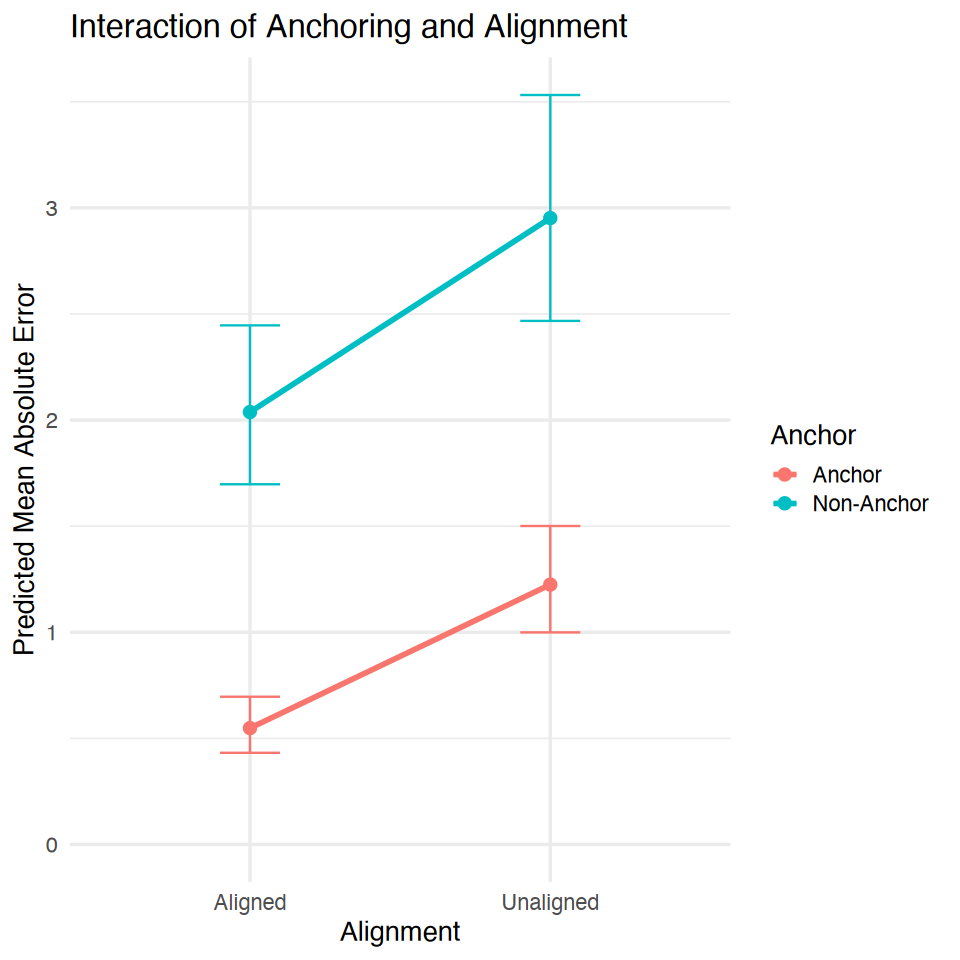

In [ ]:
em_anchor_alignment <- emmeans(modelRound, ~ anchor * alignment)
summary(em_anchor_alignment)

plot_anchor_alignment <- as.data.frame(em_anchor_alignment) %>%
  mutate(
    predicted = exp(emmean),
    anchor = ifelse(anchor == -1, "Anchor", "Non-Anchor"),
    alignment = ifelse(alignment == -1, "Aligned", "Unaligned")
  ) %>%
  ggplot(aes(x = alignment, y = predicted, group = anchor, color = anchor)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = exp(asymp.LCL), ymax = exp(asymp.UCL)), width = 0.2) +
  coord_cartesian(ylim = c(0, NA)) +
  theme_minimal(base_size = 16) +   # no printing
  labs(
    title = "Interaction of Anchoring and Alignment",
    x = "Alignment",
    y = "Predicted Mean Absolute Error",
    color = "Anchor"
  )
plot_anchor_alignment

In [ ]:
model <- glmmTMB(
  absError ~ anchor * alignment * chartType + 
  distToNearest5 + distToNearest5:alignment +
    (1 + anchor + alignment + chartType | userID),
  data = data,
  family = poisson(link = "log")
)

summary(model)

 Family: poisson  ( log )
Formula:          absError ~ anchor * alignment * chartType + distToNearest5 +  
    distToNearest5:alignment + (1 + anchor + alignment + chartType |  
    userID)
Data: data

      AIC       BIC    logLik -2*log(L)  df.resid 
  26240.8   26373.5  -13100.4   26200.8      5592 

Random effects:

Conditional model:
 Groups Name        Variance Std.Dev. Corr              
 userID (Intercept) 0.48509  0.6965                     
        anchor      0.14391  0.3794   -0.90             
        alignment   0.02043  0.1429   -0.55  0.33       
        chartType   0.02251  0.1500    0.14 -0.14 -0.25 
Number of obs: 5612, groups:  userID, 60

Conditional model:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 0.25808    0.09499   2.717 0.006590 ** 
anchor                      0.57867    0.05754  10.057  < 2e-16 ***
alignment                   0.34623    0.03005  11.522  < 2e-16 ***
chartType                   0.04657    0.

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

plot_anchor <- make_predictor_plot(model, "anchor", "Effect of Anchoring")
plot_alignment <- make_predictor_plot(model, "alignment", "Effect of Alignment")
plot_chartType <- make_predictor_plot(model, "chartType", "Effect of Chart Type")

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


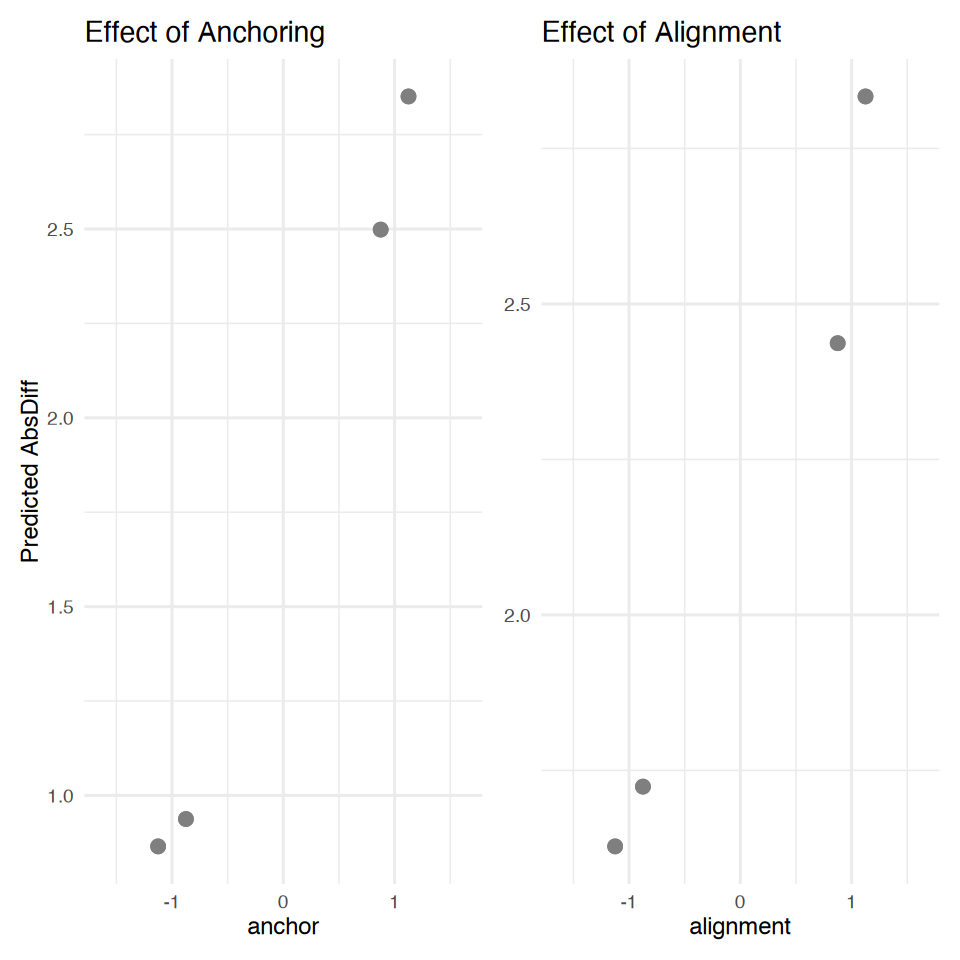

In [ ]:
plot_anchor + plot_alignment + plot_layout(guides="collect", axes="collect")

In [ ]:
head(data)

,responseTime,prolificID,userID,questionNum,response,loadTime,questionID,selectedPart,alignmentCategory,anchorCategory,⋯,anchor,alignment,meanError,excludedError,excludedResponseError,meanTime,excludedTime,excludedResponseTime,anchorType,distToNearest5
,<dbl>,<chr>,<int>,<dbl>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,5.359,65847ecf0896ca006d2c00b7,2,0,30,2025-04-22 17:52:57.854,97,25,far-from-aligned,anchor,⋯,-1,1,2.28125,included,includedResponse,5.23901,included,includedResponse,25,0
2,3.518,65847ecf0896ca006d2c00b7,2,1,25,2025-04-22 17:53:03.377,98,25,aligned,anchor,⋯,-1,-1,2.28125,included,includedResponse,5.23901,included,includedResponse,25,0
3,3.578,65847ecf0896ca006d2c00b7,2,2,22,2025-04-22 17:53:07.000,99,21,aligned,near-anchor,⋯,1,-1,2.28125,included,includedResponse,5.23901,included,includedResponse,non-anchor,1
4,6.439,65847ecf0896ca006d2c00b7,2,3,50,2025-04-22 17:53:10.687,100,46,far-from-aligned,near-anchor,⋯,1,1,2.28125,included,includedResponse,5.23901,included,includedResponse,non-anchor,1
5,4.095,65847ecf0896ca006d2c00b7,2,4,40,2025-04-22 17:53:17.227,101,39,near-aligned,far-anchor,⋯,1,1,2.28125,included,includedResponse,5.23901,included,includedResponse,non-anchor,1
6,5.763,65847ecf0896ca006d2c00b7,2,5,29,2025-04-22 17:53:21.422,102,32,near-aligned,far-anchor,⋯,1,1,2.28125,included,includedResponse,5.23901,included,includedResponse,non-anchor,2


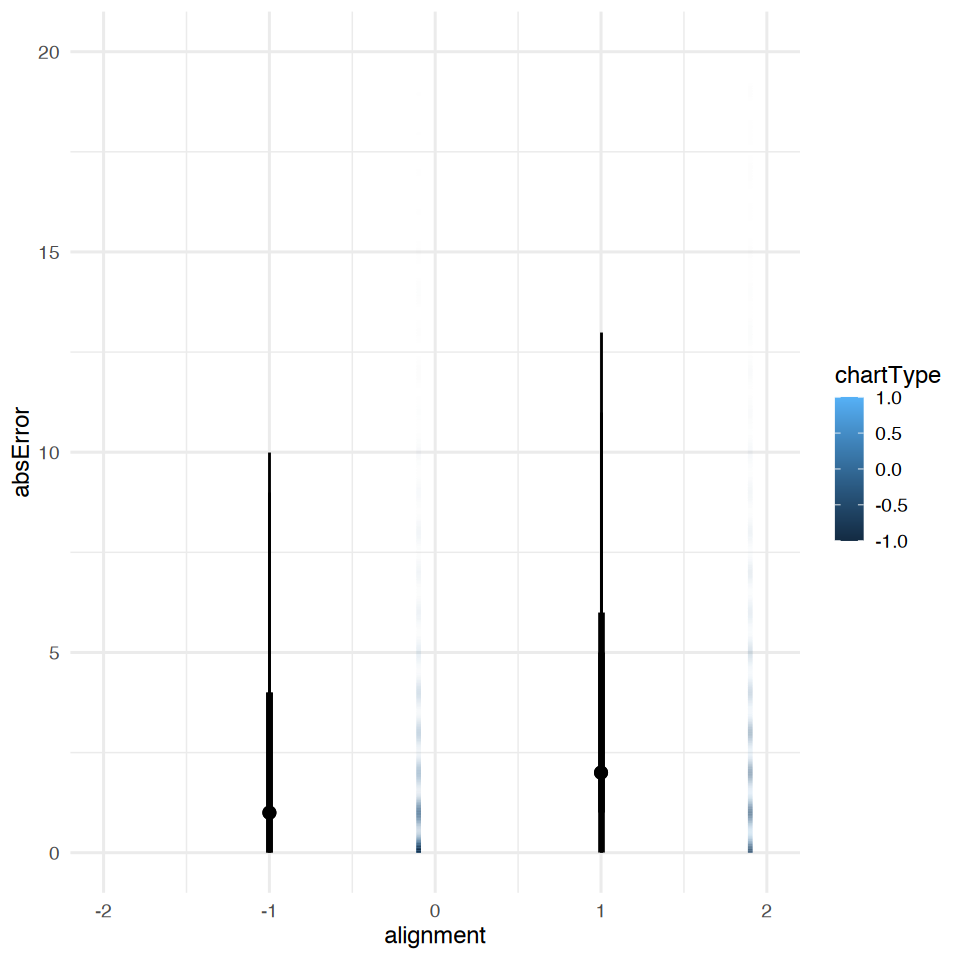

In [ ]:
ggplot(data, aes(x = alignment, y = absError, group = chartType, slab_color=chartType)) +
  stat_gradientinterval(
    fill_type = "gradient"
      ) +
  theme_minimal(base_size = 14)
